Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)


---
- [ ] My target is gold price. I will predict the "High" column in my tabular gold.csv dataset from Yahoo.com. I will also consider engineering an "Average" column for average price between "High" and "Low".
- [ ] My problem is price prediction, using regression.
- [ ] How is my target distributed?
    - Regression: Is the target right-skewed? (No). If so, you may want to log transform the target. (It's a normal distribution.)
- [ ] My evaluation metric(s).
    - Regression: **mean absolute error** (consider root mean squared error, R^2, or other regression metrics)
- [ ] Observations used to train, validate, and test the model(s): Train/Val/Test split FIRST to avoid data leakage, use time-based split or split by row numbers. Then, wrangle function to make new 'Average' price column, and drop date column.
    - Are some observations outliers? (No) Will you exclude them? (N/A)
    - Will I do a random split? NO (data leakage!)
- [ ] Clean and explore data: The gold.csv data is clean, as historical financial CSV data usually seems to be (in my short experience). I imported the data from Yahoo via the URL so the data is more portable and current for any user of the notebook.
- [ ] Features, if any, to exclude: Would some features "leak" future information? : Exclude 'Date" column to avoid data leakage of future information.

In [181]:
# https://lambdaschool.github.io/ds/unit2/portfolio-project/ds14

# https://finance.yahoo.com/quote/GLD/history?p=GLD

import pandas as pd
import numpy as np

yahoo_gold_url = 'https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1100736000&period2=1587427200&interval=1d&events=history'

gold = pd.read_csv(yahoo_gold_url)

gold

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
1,2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2,2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
3,2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
4,2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100
...,...,...,...,...,...,...,...
3875,2020-04-14,162.729996,164.419998,161.779999,162.679993,162.679993,17095100
3876,2020-04-15,161.800003,162.539993,160.809998,161.850006,161.850006,12141900
3877,2020-04-16,161.880005,163.149994,160.649994,161.710007,161.710007,9233200
3878,2020-04-17,159.720001,160.070007,158.119995,158.570007,158.570007,14652700


In [0]:
# No NaNs
# gold.isna().sum()

In [0]:
# Assign gold df to variable
train = gold

In [184]:
# Split train into train & test
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

(train.shape, test.shape)

((3104, 7), (776, 7))

In [185]:
# Split train into train and val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

(train.shape, val.shape)

((2483, 7), (621, 7))

In [186]:
# Add New Column with Average Price
train['Average'] = (train['High'] + train['Low'])/2
val['Average'] = (val['High'] + val['Low'])/2
test['Average'] = (test['High'] + test['Low'])/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Convert Date column to datetime format

#train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)
#val['Date'] = pd.to_datetime(val['Date'], infer_datetime_format=True)
#test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

# Commented out because it caused a slightly worse MAE score.

In [0]:
# Extract components from Date

#train['year'] = train['Date'].dt.year
#train['month'] = train['Date'].dt.month
#train['day'] = train['Date'].dt.day

#val['year'] = val['Date'].dt.year
#val['month'] = val['Date'].dt.month
#val['day'] = val['Date'].dt.day

#test['year'] = test['Date'].dt.year
#test['month'] = test['Date'].dt.month
#test['day'] = test['Date'].dt.day

# Commented out because it caused a slightly worse MAE score.

In [0]:
# Drop the original Date column
train = train.drop(columns=['Date'])
val = val.drop(columns=['Date'])
test = test.drop(columns=['Date'])

In [190]:
# Baseline?
train['High'].value_counts(normalize=True)

116.239998    0.001611
121.029999    0.001611
125.570000    0.001611
120.989998    0.001208
42.480000     0.001208
                ...   
116.599998    0.000403
158.460007    0.000403
92.370003     0.000403
137.279999    0.000403
119.000000    0.000403
Name: High, Length: 2154, dtype: float64

In [0]:
# Assign target column to variable
target = 'High'

How is the target distributed?

In [0]:
# Assign target to y for seaborn plot
y = train['High']

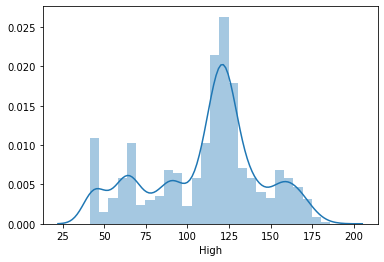

In [193]:
# Looks normal
import seaborn as sns
sns.distplot(y);

In [194]:
# No outliers
y.describe()

count    2483.000000
mean      111.102602
std        33.510967
min        41.360001
25%        89.630001
50%       118.410004
75%       128.539993
max       185.850006
Name: High, dtype: float64

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [196]:
# Linear Regression Val
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    LinearRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: ${mae:}')

Validation MAE: $5.964423358498741e-09


In [197]:
# Linear Regression Test
X_test = test.drop(columns=target)
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:}')

Test MAE: $6.15707354058976e-09


In [198]:
# Create pipeline with predictive model, fit to train dataset, and make predictions on validation dataset.
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: ${mae:}')

Validation MAE: $0.20348891450884668


In [199]:
X_test = test.drop(columns=target)
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:}')

Test MAE: $0.21896105747421898
